## HW1-Build Your First Model

Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sympy
import pint
UNITS = pint.UnitRegistry()
import modsim
from modsim import*

### 1. Falling Pennies Model

#### Define units

In [2]:
meter = UNITS.meter
second = UNITS.second
mile = UNITS.mile
hour = UNITS.hour

#### Define variables

In [3]:
# Height of the building
h = 381 * meter

# Accelaration of the gravity (a = g)
a = 9.8 * meter / second**2


#### Height formula from free fall with an initial velocity = 0:

$v^{2}$ = 2ah 

v = $\sqrt{2ah}$ 

#### Velocity of the penny (in meter per second)

In [4]:
v = np.sqrt (2*a*h).round(0)
v

86.0 <Unit('meter / second')>

#### Convert te velocity in mile per hour

In [5]:
v.to(mile/hour).round(0)

192.0 <Unit('mile / hour')>

### 2. Bikeshare

#### Call state object and define bikes move functions

In [6]:
bikeshare = State (olin = 10, wellesley = 2)

def bike_to_wellesley():
    bikeshare.olin -=1
    bikeshare.wellesley +=1
    
def bike_to_olin():
    bikeshare.olin +=1
    bikeshare.wellesley -=1


#### Define step function

In [7]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

#### run_simulation function

In [8]:
def run_simulation(p1, p2, num_steps):
    results = TimeSeries()
    
    for i in range(num_steps):
        step(p1, p2)
        results[i] = bikeshare.olin
        
    plot(results, label ='Olin')

    
    decorate(title='Bikeshare Olin-Wellesley',
            xlabel ='Time step (min)',
            ylabel ='Number of bikes')
   

#### Test the function

Saving figure to file figs_hw1-604.pdf


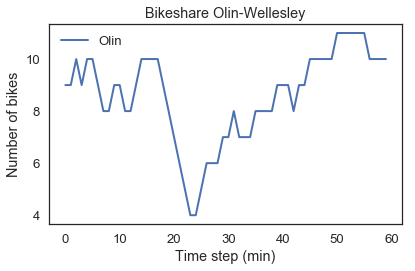

In [9]:
bikeshare = State (olin = 10, wellesley = 2)
p1 = 0.3
p2 = 0.2
num_steps = 60

run_simulation(p1, p2, num_steps)
savefig('figs_hw1-604.pdf')

In [10]:
bikeshare

,values
olin,10
wellesley,2


### Optional: Extend solution

#### Define extend_simulation function to keep track of both Olin and Wellesley

In [11]:
def extend_simulation(p1, p2, num_steps):
    results = TimeSeries()
    
    for i in range(num_steps):
        step(p1, p2)
        results[i] = bikeshare.olin, bikeshare.wellesley
    
    line = plot(results)
    
    plt.legend(line, ('Olin', 'Wellesley'))
    
    
    
    decorate(title='Bikeshare Olin-Wellesley & Wellesley-Olin',
            xlabel ='Time step (min)',
            ylabel ='Number of bikes')

    
   

#### Test results: Plot

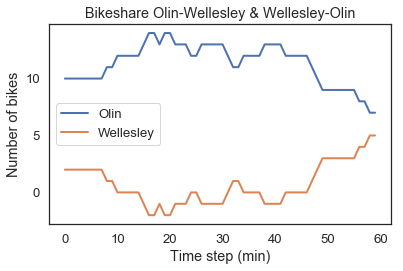

In [12]:
bikeshare = State (olin = 10, wellesley = 2)
p1 = 0.3
p2 = 0.2
num_steps = 60

extend_simulation(p1, p2, num_steps)

In [13]:
bikeshare

,values
olin,7
wellesley,5


### 3. Iterative modeling 

#### Create a state object and define functions to move one bike

In [14]:
bikeshare = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0, clock=0)

In [15]:
def bike_to_wellesley(state):
    
    if state.olin == 0:
        state.olin_empty +=1
        return
    
    state.olin -=1
    state.wellesley +=1
    

def bike_to_olin(state):
    if state.wellesley == 0:
        state.wellesley_empty +=1
        return
    
    state.olin +=1
    state.wellesley -=1

#### Step function
Modify step function to add one to clock each time it is invoked

In [16]:
def step(state, p1, p2):
    
    state.clock +=1
    
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
       

#### Run_simulation function

In [17]:
def run_simulation(state, p1, p2, num_steps):
    results = TimeSeries()
    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = bikeshare.olin
        
    plot(results, label ='Olin')

    
    decorate(title='Bikeshare Olin-Wellesley',
            xlabel ='Time step (min)',
            ylabel ='Number of bikes')

#### Test results

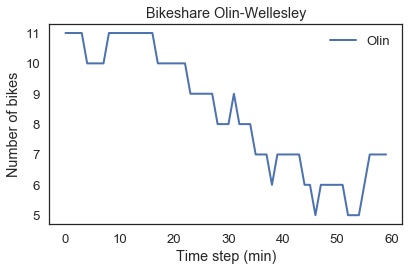

In [18]:
bikeshare = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0, clock=0)
state = bikeshare
p1 = 0.3
p2 = 0.2
num_steps = 60

run_simulation(state, p1, p2, num_steps)

In [19]:
bikeshare

,values
olin,7
wellesley,5
olin_empty,0
wellesley_empty,0
clock,60


### Continuing the previous exercise
Record the time when the first customer arrives and doesn't find a bike

#### Create a new state object

In [20]:
bikeshare = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0, clock =0, t_first_empty =-1)
bikeshare

,values
olin,10
wellesley,2
olin_empty,0
wellesley_empty,0
clock,0
t_first_empty,-1


#### Modifying step function

In [21]:
def step(state, p1, p2):
    
    state.clock +=1
    
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
    
    if state.t_first_empty !=-1:  # Do nothing if t_first_empty has been set
        return
        
    # Set t_first_empty to the clock when either of olin_empty or wellesley_empty is different to 0
    
    if (state.olin_empty != 0 or state.wellesley_empty !=0):
        state.t_first_empty = state.clock
        
        

#### Run new simulation

In [22]:
def run_simulation(state, p1, p2, num_steps):
    results = TimeSeries()
    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = bikeshare.olin
        
    plot(results, label ='Olin')

    
    decorate(title='Bikeshare Olin-Wellesley',
            xlabel ='Time step (min)',
            ylabel ='Number of bikes')

#### Test the results

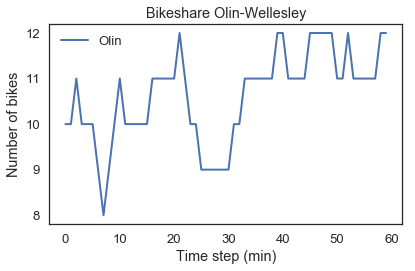

In [23]:
bikeshare = State(olin=10, wellesley=2, olin_empty=0, wellesley_empty=0, clock=0, t_first_empty=-1)
state = bikeshare
p1 = 0.3
p2 = 0.2
num_steps = 60

run_simulation(state, p1, p2, num_steps)

In [24]:
state

,values
olin,12
wellesley,0
olin_empty,0
wellesley_empty,1
clock,60
t_first_empty,41
